In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import math 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
from scipy.stats import kurtosis, skew

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [4]:
mh1=pd.read_csv("C:\\Users\\warukira\\Desktop\\BIG Data\\Group 4 project\\Melbourne_housing_FULL.csv", index_col=7,parse_dates=True)
mh1.head(1)
#reading data by sorting dates

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Date,,,,,,,,,,,,,,,,,,,,
2016-01-28,Canterbury,140 Canterbury Rd,4,h,NaN,SP,Fletchers,9.0,3126.0,4.0,2.0,0.0,808.0,198.0,1910.0,Boroondara City Council,-37.8235,145.0751,Southern Metropolitan,3265.0


In [5]:
mh1.tail(1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Date,,,,,,,,,,,,,,,,,,,,
2018-03-17,Yarraville,30 Sussex St,3,h,1200000.0,SP,Jas,6.3,3013.0,3.0,1.0,0.0,268.0,119.0,1915.0,Maribyrnong City Council,-37.81968,144.89142,Western Metropolitan,6543.0


In [6]:
mh1.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [7]:
mh1.count()
#count number of row in each column with values

Suburb           34857
Address          34857
Rooms            34857
Type             34857
Price            27247
Method           34857
SellerG          34857
Distance         34856
Postcode         34856
Bedroom2         26640
Bathroom         26631
Car              26129
Landsize         23047
BuildingArea     13742
YearBuilt        15551
CouncilArea      34854
Lattitude        26881
Longtitude       26881
Regionname       34854
Propertycount    34854
dtype: int64

In [8]:
sub_mean=mh1.groupby('Suburb').mean()[['Price']]
#mean price of each suburb

In [9]:
sub_mean.round(3)

,Price
Suburb,
Abbotsford,1033549.020
Aberfeldie,1307192.857
Airport West,751364.245
Albanvale,536055.556
Albert Park,1927650.538
Albion,615123.731
Alphington,1397532.258
Altona,884155.505
Altona Meadows,653557.692


In [10]:
null_sub = pd.isnull(sub_mean["Price"])
#finding suburbs with nan values

In [11]:
sub_mean[null_sub]

,Price
Suburb,
Avonsleigh,NaN
Belgrave,NaN
Guys Hill,NaN
Hopetoun Park,NaN
Menzies Creek,NaN
Olinda,NaN


In [12]:
mh1= mh1[mh1.Suburb != 'Avonsleigh']
mh1= mh1[mh1.Suburb != 'Belgrave']
mh1= mh1[mh1.Suburb != 'Guys Hill']
mh1= mh1[mh1.Suburb != 'Hopetoun Park']
mh1= mh1[mh1.Suburb != 'Menzies Creek']
mh1= mh1[mh1.Suburb != 'Olinda']
#dropping the suburbs with no price values

In [13]:
sub_mean1= mh1.groupby('Suburb').mean()[['Price']]

In [14]:
sub_mean1.round(3)

,Price
Suburb,
Abbotsford,1033549.020
Aberfeldie,1307192.857
Airport West,751364.245
Albanvale,536055.556
Albert Park,1927650.538
Albion,615123.731
Alphington,1397532.258
Altona,884155.505
Altona Meadows,653557.692


In [15]:
null_sub1 = pd.isnull(sub_mean1["Price"])

In [16]:
sub_mean1[null_sub1]
#there are no suburbs with nan values in mh1

,Price
Suburb,


In [17]:
mh1['Price'] = mh1.groupby(['Suburb'])['Price']\
    .transform(lambda x: x.fillna(x.mean()))
#fill missing price with mean suburb price accordingly

In [18]:
mh1.head(1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Date,,,,,,,,,,,,,,,,,,,,
2016-01-28,Canterbury,140 Canterbury Rd,4,h,2.386271e+06,SP,Fletchers,9.0,3126.0,4.0,2.0,0.0,808.0,198.0,1910.0,Boroondara City Council,-37.8235,145.0751,Southern Metropolitan,3265.0


In [19]:
mh1.Price = mh1.Price.round(2)

In [20]:
mh1.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Date,,,,,,,,,,,,,,,,,,,,
2016-01-28,Canterbury,140 Canterbury Rd,4,h,2386270.59,SP,Fletchers,9.0,3126.0,4.0,2.0,0.0,808.0,198.0,1910.0,Boroondara City Council,-37.8235,145.0751,Southern Metropolitan,3265.0
2016-01-28,Surrey Hills,1/10 Florence Rd,2,u,813000.00,S,Fletchers,11.2,3127.0,2.0,1.0,2.0,108.0,NaN,NaN,Boroondara City Council,-37.8276,145.1023,Southern Metropolitan,5457.0
2016-01-28,Surrey Hills,999A Riversdale Rd,3,h,1205000.00,S,Fletchers,11.2,3127.0,3.0,1.0,2.0,490.0,NaN,NaN,Boroondara City Council,-37.8361,145.1006,Southern Metropolitan,5457.0
2016-02-04,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
2016-02-04,Abbotsford,18/659 Victoria St,3,u,1033549.02,VB,Rounds,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
2016-02-04,Altona,1/123 Blyth St,2,t,720000.00,S,hockingstuart,13.8,3018.0,2.0,1.0,2.0,292.0,125.0,2013.0,Hobsons Bay City Council,-37.8687,144.8197,Western Metropolitan,5301.0
2016-02-04,Ascot Vale,42 Archer Av,3,h,895000.00,S,Nelson,5.9,3032.0,NaN,NaN,NaN,NaN,NaN,NaN,Moonee Valley City Council,NaN,NaN,Western Metropolitan,6567.0
2016-02-04,Ashburton,7A Wirraway Ct,3,h,1660385.32,S,Buxton,11.0,3147.0,3.0,1.0,1.0,370.0,100.0,1950.0,Boroondara City Council,-37.8675,145.0895,Southern Metropolitan,3052.0
2016-02-04,Ashwood,4 Mitchell Av,3,h,1173156.77,SP,Buxton,12.2,3147.0,NaN,NaN,NaN,NaN,NaN,NaN,Monash City Council,NaN,NaN,Southern Metropolitan,2894.0


In [21]:
mh1['Price'].isna().sum()
#checking to see if there is any missing values in price column

0

In [22]:
subtypeL_mean= mh1.groupby(['Suburb','Type'])['Landsize'].mean()
#mean landsize of each suburb groupedby type of property

In [23]:
subtypeL_mean.head()

Suburb      Type
Abbotsford  h        188.696970
            t       1643.666667
            u        769.588235
Aberfeldie  h        579.673469
            t        344.666667
Name: Landsize, dtype: float64

In [24]:
subtypeB_mean= mh1.groupby(['Suburb','Type'])['BuildingArea'].mean()
#mean building area of each suburb groupedby type of property

In [25]:
subtypeB_mean.head()

Suburb      Type
Abbotsford  h       113.782609
            t        80.000000
            u        66.583333
Aberfeldie  h       200.154333
            t       182.333333
Name: BuildingArea, dtype: float64

In [26]:
mh1['Landsize'] = mh1.groupby(['Suburb', 'Type'])['Landsize']\
    .transform(lambda x: x.fillna(x.mean()))
#fill missing landsize values with mean suburb landsize groupedby type of property

In [27]:
mh1['BuildingArea'] = mh1.groupby(['Suburb', 'Type'])['BuildingArea']\
    .transform(lambda x: x.fillna(x.mean()))
##fill missing building area values with mean suburb build area groupedby type of property

In [28]:
mh1.Landsize = mh1.Landsize.round(1)

In [29]:
mh1.BuildingArea = mh1.BuildingArea.round(1)

In [30]:
mh1.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Date,,,,,,,,,,,,,,,,,,,,
2016-01-28,Canterbury,140 Canterbury Rd,4,h,2386270.59,SP,Fletchers,9.0,3126.0,4.0,2.0,0.0,808.0,198.0,1910.0,Boroondara City Council,-37.8235,145.0751,Southern Metropolitan,3265.0
2016-01-28,Surrey Hills,1/10 Florence Rd,2,u,813000.00,S,Fletchers,11.2,3127.0,2.0,1.0,2.0,108.0,87.9,NaN,Boroondara City Council,-37.8276,145.1023,Southern Metropolitan,5457.0
2016-01-28,Surrey Hills,999A Riversdale Rd,3,h,1205000.00,S,Fletchers,11.2,3127.0,3.0,1.0,2.0,490.0,225.3,NaN,Boroondara City Council,-37.8361,145.1006,Southern Metropolitan,5457.0


In [31]:
mh1.count()

Suburb           34851
Address          34851
Rooms            34851
Type             34851
Price            34851
Method           34851
SellerG          34851
Distance         34850
Postcode         34850
Bedroom2         26635
Bathroom         26626
Car              26125
Landsize         34608
BuildingArea     34495
YearBuilt        15549
CouncilArea      34848
Lattitude        26876
Longtitude       26876
Regionname       34848
Propertycount    34848
dtype: int64

In [32]:
mh1['BuildingAge'] = 2018- mh1['YearBuilt']
#finding how old is each property

In [33]:
mh1.head(1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,BuildingAge
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-28,Canterbury,140 Canterbury Rd,4,h,2386270.59,SP,Fletchers,9.0,3126.0,4.0,...,0.0,808.0,198.0,1910.0,Boroondara City Council,-37.8235,145.0751,Southern Metropolitan,3265.0,108.0


In [34]:
mh1['BuildingAge'] = mh1.groupby(['Suburb'])['BuildingAge']\
    .transform(lambda x: x.fillna(x.median()))
#filling missing building age values with median building age value of each suburb

In [35]:
mh1.count()

Suburb           34851
Address          34851
Rooms            34851
Type             34851
Price            34851
Method           34851
SellerG          34851
Distance         34850
Postcode         34850
Bedroom2         26635
Bathroom         26626
Car              26125
Landsize         34608
BuildingArea     34495
YearBuilt        15549
CouncilArea      34848
Lattitude        26876
Longtitude       26876
Regionname       34848
Propertycount    34848
BuildingAge      34733
dtype: int64

In [36]:
mh1.head(1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,BuildingAge
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-28,Canterbury,140 Canterbury Rd,4,h,2386270.59,SP,Fletchers,9.0,3126.0,4.0,...,0.0,808.0,198.0,1910.0,Boroondara City Council,-37.8235,145.0751,Southern Metropolitan,3265.0,108.0


In [37]:
mh2= mh1.drop(['Address','Method','Postcode','Bedroom2','Bathroom','Car','YearBuilt','CouncilArea','Propertycount'], axis= 1)
#keeping the columns that are required for analysis

In [38]:
mh2.head()

,Suburb,Rooms,Type,Price,SellerG,Distance,Landsize,BuildingArea,Lattitude,Longtitude,Regionname,BuildingAge
Date,,,,,,,,,,,,
2016-01-28,Canterbury,4,h,2386270.59,Fletchers,9.0,808.0,198.0,-37.8235,145.0751,Southern Metropolitan,108.0
2016-01-28,Surrey Hills,2,u,813000.00,Fletchers,11.2,108.0,87.9,-37.8276,145.1023,Southern Metropolitan,78.0
2016-01-28,Surrey Hills,3,h,1205000.00,Fletchers,11.2,490.0,225.3,-37.8361,145.1006,Southern Metropolitan,78.0
2016-02-04,Abbotsford,2,h,1035000.00,Biggin,2.5,156.0,79.0,-37.8079,144.9934,Northern Metropolitan,118.0
2016-02-04,Abbotsford,3,u,1033549.02,Rounds,2.5,0.0,66.6,-37.8114,145.0116,Northern Metropolitan,95.5


In [39]:
mh2.count()

Suburb          34851
Rooms           34851
Type            34851
Price           34851
SellerG         34851
Distance        34850
Landsize        34608
BuildingArea    34495
Lattitude       26876
Longtitude      26876
Regionname      34848
BuildingAge     34733
dtype: int64

### Creating dataframe for Hugh Jackman 

In [40]:
hj1= mh2.loc[mh2['Price'] < 1000000]

In [41]:
hj1.head()
#Hugh Jackman dataset- Prices within $1 million what he want to invest.

,Suburb,Rooms,Type,Price,SellerG,Distance,Landsize,BuildingArea,Lattitude,Longtitude,Regionname,BuildingAge
Date,,,,,,,,,,,,
2016-01-28,Surrey Hills,2,u,813000.0,Fletchers,11.2,108.0,87.9,-37.8276,145.1023,Southern Metropolitan,78.0
2016-02-04,Altona,2,t,720000.0,hockingstuart,13.8,292.0,125.0,-37.8687,144.8197,Western Metropolitan,5.0
2016-02-04,Ascot Vale,3,h,895000.0,Nelson,5.9,397.6,164.6,NaN,NaN,Western Metropolitan,98.0
2016-02-04,Balwyn,1,u,450000.0,MICM,9.7,136.5,86.7,NaN,NaN,Southern Metropolitan,58.0
2016-02-04,Bentleigh East,3,t,775000.0,Stockdale,13.9,291.9,176.0,NaN,NaN,Southern Metropolitan,48.0


In [42]:
hj1.describe()

,Rooms,Price,Distance,Landsize,BuildingArea,Lattitude,Longtitude,BuildingAge
count,19382.000000,19382.000000,19381.000000,19160.000000,19069.000000,14233.000000,14233.000000,19279.000000
mean,2.754927,691456.062716,12.704025,524.862620,131.891777,-37.788795,144.976187,45.916697
std,0.904155,177630.452869,7.706074,1254.640049,199.049466,0.103949,0.141861,25.475427
min,1.000000,85000.000000,0.000000,0.000000,0.000000,-38.190430,144.423790,0.000000
25%,2.000000,563062.500000,7.200000,207.800000,88.000000,-37.848890,144.891160,28.000000
50%,3.000000,692500.000000,11.200000,471.500000,126.000000,-37.779400,144.982120,48.000000
75%,3.000000,835375.000000,15.500000,631.000000,156.100000,-37.720400,145.056400,58.000000
max,12.000000,999999.000000,48.100000,80000.000000,14947.700000,-37.390200,145.526350,198.000000


In [43]:
hj1.count()

Suburb          19382
Rooms           19382
Type            19382
Price           19382
SellerG         19382
Distance        19381
Landsize        19160
BuildingArea    19069
Lattitude       14233
Longtitude      14233
Regionname      19379
BuildingAge     19279
dtype: int64

In [44]:
hj1_D = hj1.dropna()
#dropping nan values
print(hj1_D)

                      Suburb  Rooms Type      Price        SellerG  Distance  \
Date                                                                           
2016-01-28      Surrey Hills      2    u  813000.00      Fletchers      11.2   
2016-02-04            Altona      2    t  720000.00  hockingstuart      13.8   
2016-02-04         Chadstone      4    h  890000.00   Purplebricks      13.6   
2016-02-04            Coburg      3    h  675000.00         Walshe       7.8   
2016-02-04          Essendon      3    h  911000.00        Rendina       8.0   
2016-02-04         Footscray      1    u  216000.00        Sweeney       6.4   
2016-02-04         Maidstone      2    h  927000.00   Purplebricks       9.2   
2016-02-04       Maribyrnong      3    t  560000.00         Biggin       8.7   
2016-02-04       Maribyrnong      3    t  560000.00         Biggin       8.7   
2016-02-04       Mont Albert      2    u  750000.00             RW      11.8   
2016-02-04    Oakleigh South      4    h

In [45]:
Kl = pd.isnull(hj1_D)
Kl.head()

,Suburb,Rooms,Type,Price,SellerG,Distance,Landsize,BuildingArea,Lattitude,Longtitude,Regionname,BuildingAge
Date,,,,,,,,,,,,
2016-01-28,False,False,False,False,False,False,False,False,False,False,False,False
2016-02-04,False,False,False,False,False,False,False,False,False,False,False,False
2016-02-04,False,False,False,False,False,False,False,False,False,False,False,False
2016-02-04,False,False,False,False,False,False,False,False,False,False,False,False
2016-02-04,False,False,False,False,False,False,False,False,False,False,False,False


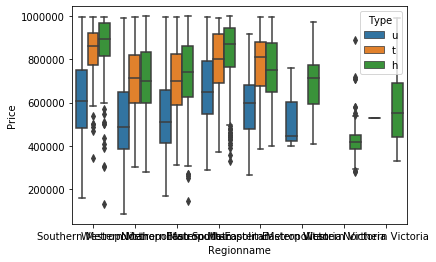

In [46]:
sns.boxplot(x="Regionname", y="Price", hue="Type", data= hj1_D);

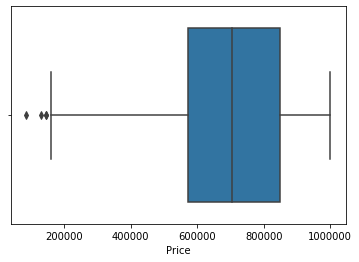

In [47]:
# finding the Outliers using a box plot
sns.boxplot(x=hj1_D['Price'])

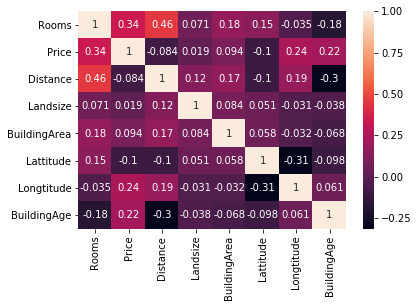

In [48]:
sns.heatmap(hj1_D.corr(),annot=True)

#You can see that there are a few  variables that are even somewhat correlated  but there are no strong correlation . the highest which is still low is between price and rooms.

In [49]:
(hj1_D.corr()["Price"].sort_values(ascending = False))[1:]

#There is no strong correlation only Moderate. Generally speaking, this is how we measure the strength of correlations.

#Very strong relationship (|r|>0.8 =>)
#Strong relationship (0.6≤|r|)
#Moderate relationship (0.4≤|r|)
#Weak relationship (0.2≤|r|)
#Very weak relationship (|r

Rooms           0.342290
Longtitude      0.244786
BuildingAge     0.222420
BuildingArea    0.093556
Landsize        0.018527
Distance       -0.083949
Lattitude      -0.100143
Name: Price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2BBEC9240>,
      dtype=object)

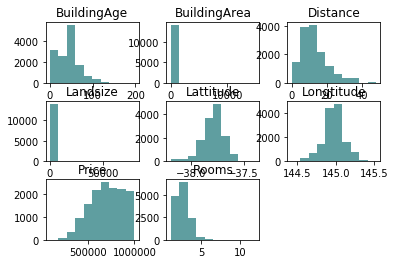

In [50]:
hj1_D.hist(grid = False, color = 'cadetblue')

In [51]:
# Skewness and kurtosis
print ('Skewness:' + str(hj1_D['Price'].skew()))
print ('Kurtosis:' + str(hj1_D['Price'].kurt()))

#Skewness: the degree of distortion from the symmetrical bell curve or normal curve ... A symmetrical distribution will have skeweness of "0"
#Kurtosis is the measure of "tailedness" of a probability .. Platykurtic value >3 or more.. Mesokurtic (normal curve - Standard value 3)

Skewness:-0.27288247604715266
Kurtosis:-0.7141094494082427


# BUILDING A MODEL

### 1. Split the Data ( Hugh Jackman Snr)

In [101]:
decisive_columns = hj1_D[['Rooms','Distance','Landsize','BuildingArea','Lattitude']]
print(decisive_columns.describe())

              Rooms     Distance      Landsize  BuildingArea     Lattitude
count  14126.000000  14126.00000  14126.000000   14126.00000  14126.000000
mean       2.837888     13.04433    541.438128     135.33061    -37.788518
std        0.909605      7.84317   1426.764677     192.52605      0.103694
min        1.000000      0.00000      0.000000       0.00000    -38.190430
25%        2.000000      7.70000    196.000000      92.00000    -37.847900
50%        3.000000     11.50000    507.500000     130.80000    -37.779315
75%        3.000000     16.30000    646.000000     158.10000    -37.720485
max       12.000000     48.10000  80000.000000   14947.70000    -37.390200


In [102]:
X = decisive_columns
y = hj1_D.Price

### Splitting the dataset into Train and Test

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,train_y,test_y = train_test_split(X,y,test_size=0.2)

### Linear Regression

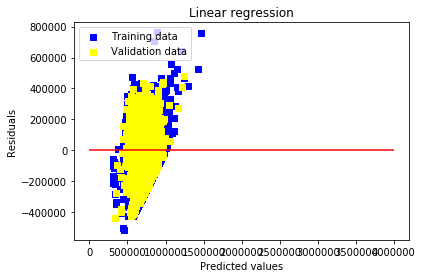

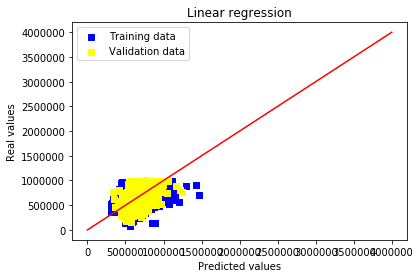

In [55]:
# Linear Regression
lr = linear_model.LinearRegression()
lr.fit(X_train, train_y)

# Look at predictions on training and validation set
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - train_y, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - test_y, c = "yellow", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 4e6, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, train_y, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, test_y, c = "yellow", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 4e6], [10.5, 4e6], c = "red")
plt.show()

#R-Squared

In [56]:
reg = linear_model.LinearRegression()
reg.fit(X_train, train_y)
Y_pred = reg.predict(X_test)
r2 = reg.score(X_test,test_y)
print("R^2 value :" + str(r2) )

R^2 value :0.22040717437451618


The value R2 quantifies goodness of fit.

•It is a fraction between 0.0 and 1.0, and has no units. Higher values indicate that the model fits the data better. 


In [57]:
print(Y_pred)

[638124.1598991  659454.63290989 828756.73687004 ... 686143.63834879
 967755.16012634 644876.48067898]


In [58]:
reg.score(X_test,test_y)

0.22040717437451618

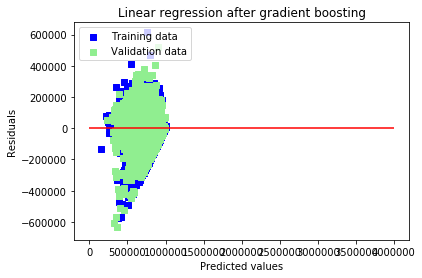

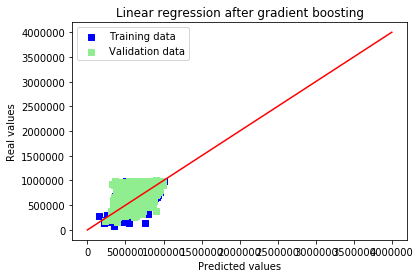

In [59]:
#Gradient Descent
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.05, loss = 'ls')
clf.fit(X_train, train_y)

# Look at predictions on training and validation set
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - train_y, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - test_y, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression after gradient boosting")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 4e6, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, train_y, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, test_y, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression after gradient boosting")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 4e6], [10.5, 4e6], c = "red")
plt.show()

#Cross validaton

In [60]:
clf.score(X_test,test_y)

0.6134201008853153

In [61]:
# Predicting test set results
y_pred = reg.predict(X_test)
print(y_pred)

[638124.1598991  659454.63290989 828756.73687004 ... 686143.63834879
 967755.16012634 644876.48067898]


In [62]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(test_y,y_pred))

R^2 = 0.2212218917117207


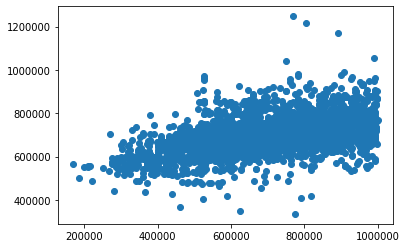

In [63]:
# Actual v predictions scatter
plt.scatter(test_y, y_pred)

In [64]:
#Cofficients
cdf = pd.DataFrame(data= reg.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Rooms,104223.125006
Distance,-8285.728441
Landsize,3.766867
BuildingArea,57.474481
Lattitude,-386344.906556


### Evaluation

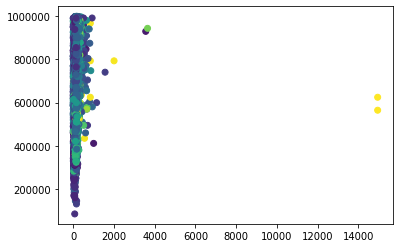

In [65]:
plt.scatter(hj1_D.BuildingArea,hj1_D.Price,c=hj1_D.Distance)

In [66]:
#Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


Text(0.5, 1.0, 'Rooms v Price')

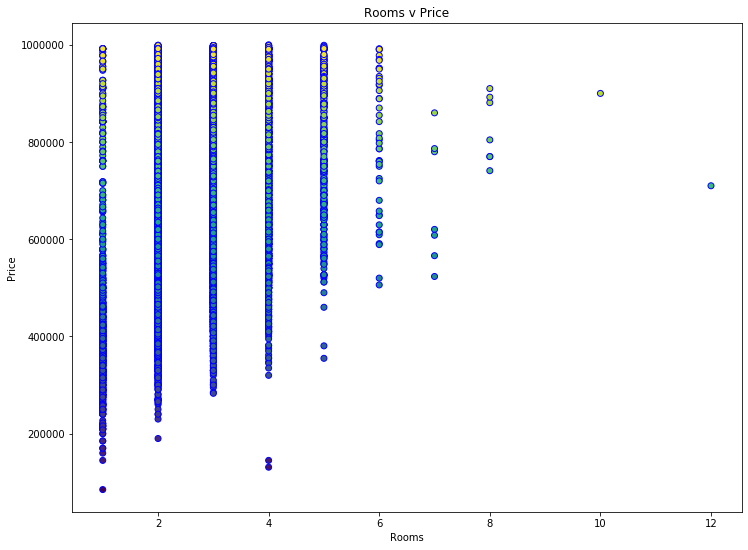

In [67]:
#sb.set_style('darkgrid')
#f, axes = plt.subplots(4,2, figsize = (20,30))

plt.scatter(x = 'Rooms', y = 'Price', data = hj1_D, edgecolor = 'b',c='Price')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Rooms v Price')

Text(0.5, 1.0, 'Distance v Price')

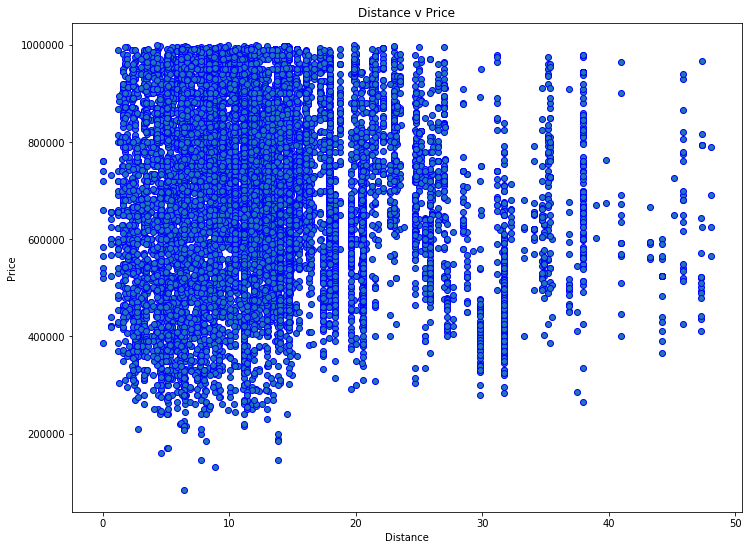

In [68]:
# Plot [0,1]
plt.scatter(x = 'Distance', y = 'Price', data = hj1_D, edgecolor = 'b')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.title('Distance v Price')

#Closer to CBD, there are a number of houses with varying price range. Farther away, the number reduces drastically.

Text(0.5, 1.0, 'Landsize v  Price')

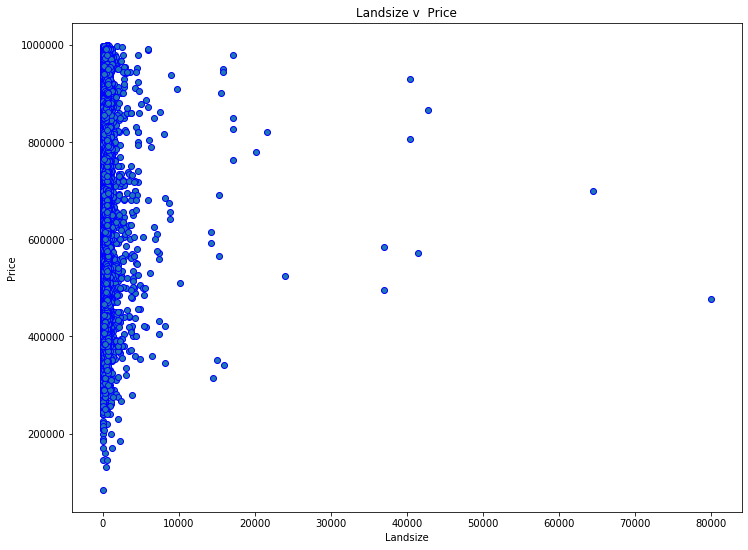

In [69]:
# Plot [2,0]
plt.scatter(x = 'Landsize', y = 'Price', data = hj1_D, edgecolor = 'b')
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.title('Landsize v  Price')

#Conclusion: Landsize doesn't distinctly affect the price of a house

Text(0.5, 1.0, 'Age v Price')

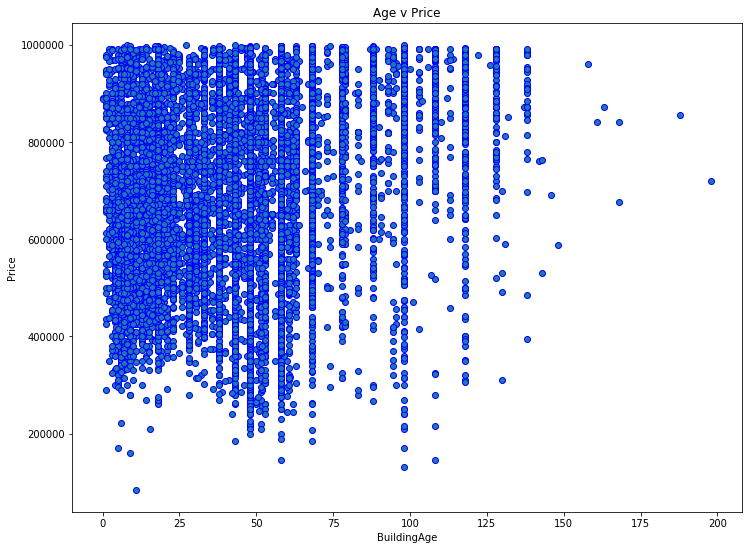

In [70]:
#Plot [3,0]
plt.scatter(x = 'BuildingAge', y = 'Price', data = hj1_D, edgecolor = 'b')
plt.xlabel('BuildingAge')
plt.ylabel('Price')
plt.title('Age v Price')

#More number of newly built houses available Price range is approximately the same for all ages of houses

## Correlation

Text(0.5, 1, 'Variable Correlation')

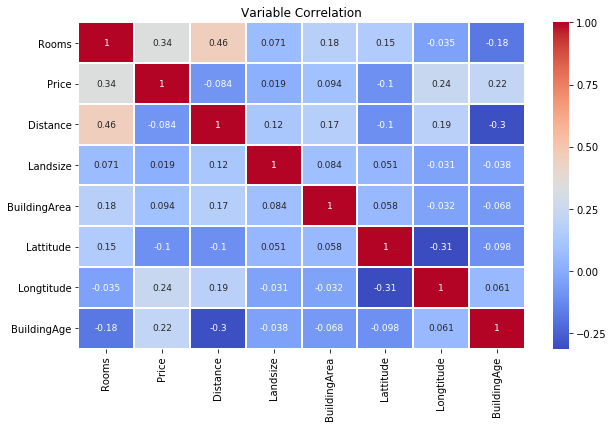

In [71]:
plt.figure(figsize=(10,6))
sns.heatmap(hj1_D.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

In [72]:
X_train.shape

(11300, 5)

In [73]:
# create a Linear Regression model object.
regression_model = LinearRegression()

# pass through the X_train & y_train data set.
regression_model.fit(X_train, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### COnfidence interval

In [74]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model.
model = sm.OLS(y, X2)

# fit the data
est = model.fit()

C:\Users\warukira\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [75]:
# make some confidence intervals, 95% by default.
est.conf_int()

,0,1
const,-1.501956e+07,-1.309188e+07
Rooms,9.972525e+04,1.062270e+05
Distance,-8.617612e+03,-7.863311e+03
Landsize,2.126136e+00,5.742767e+00
BuildingArea,5.293505e+01,8.009307e+01
Lattitude,-4.108024e+05,-3.598537e+05


#### Hypothesis testing 

In [76]:
# estimate the p-values.
est.pvalues

const           9.404869e-175
Rooms            0.000000e+00
Distance         0.000000e+00
Landsize         2.014122e-05
BuildingArea     9.198706e-22
Lattitude       1.820502e-187
dtype: float64

The p-value represents the probability that the coefficient equals 0.
We want a p-value that is less than 0.05, if it is we can reject the null hypothesis. 
In this case, the p-value for rooms & Distance coefficient is much lower than 0.05, so we can reject the null hypothesis.

### Creating dataframe for Lady Jackman and Teenage Jackman

In [110]:
lj1= mh2.loc[mh2['Landsize'] > 500]
lj2= lj1.loc[lj1['BuildingAge'] < 10]
#creating dataframe for Lady Jackman= Bigger house, 500 meter of landsize was the mean so we decided to keep the bigger houses of the data.
#she wanted a newer house with no renovation requirements so we dropped the houses that were older than 10 years

In [111]:
lj2.head(5)

,Suburb,Rooms,Type,Price,SellerG,Distance,Landsize,BuildingArea,Lattitude,Longtitude,Regionname,BuildingAge
Date,,,,,,,,,,,,
2016-04-16,Camberwell,3,h,2250000.0,O'Donoghues,7.8,656.0,225.0,-37.8410,145.0824,Southern Metropolitan,9.0
2016-04-16,Reservoir,4,h,786000.0,Nelson,11.2,595.0,174.0,-37.7283,145.0072,Northern Metropolitan,5.0
2016-04-16,South Yarra,2,u,515000.0,Harrington,3.3,734.0,65.0,-37.8433,144.9962,Southern Metropolitan,5.0
2016-04-16,South Kingsville,4,t,915000.0,Sweeney,9.1,662.0,265.0,-37.8307,144.8725,Western Metropolitan,2.0
2016-04-23,Keilor East,3,h,825000.0,Nelson,12.8,630.0,126.0,-37.7378,144.8705,Western Metropolitan,1.0


In [112]:
tj1= mh2.loc[mh2['Distance'] < 7]
#creating dataframe for teenage jackman. She wanted to live near CBD, so we dropped all properties outside 7 kms radius from CBD.

In [113]:
tj1.head(5)

,Suburb,Rooms,Type,Price,SellerG,Distance,Landsize,BuildingArea,Lattitude,Longtitude,Regionname,BuildingAge
Date,,,,,,,,,,,,
2016-02-04,Abbotsford,2,h,1035000.00,Biggin,2.5,156.0,79.0,-37.8079,144.9934,Northern Metropolitan,118.0
2016-02-04,Abbotsford,3,u,1033549.02,Rounds,2.5,0.0,66.6,-37.8114,145.0116,Northern Metropolitan,95.5
2016-02-04,Ascot Vale,3,h,895000.00,Nelson,5.9,397.6,164.6,NaN,NaN,Western Metropolitan,98.0
2016-02-04,Footscray,1,u,216000.00,Sweeney,6.4,0.0,50.0,-37.7907,144.8924,Western Metropolitan,48.0
2016-02-04,Melbourne,2,u,520000.00,Lucas,2.8,249.3,70.8,NaN,NaN,Northern Metropolitan,15.5
